In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys 
import json
import cv2 as cv

sys.path.append("./")

from common import *

In [1]:


path = os.getcwd() + "/data/output/"
dirs = [path + d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
dirs.sort()
fullpath = dirs[-1]
fullpath += "/output.csv"

#complete run
#fullpath = '/home/lollo/Documents/python/siv/SIV_project/data/output/run_1711060911/output.csv' 

#scale run
#fullpath = '/home/lollo/Documents/python/siv/SIV_project/data/output/run_171109659/output.csv' 

#denoise run
#fullpath = '/home/lollo/Documents/python/siv/SIV_project/data/output/run_1711096844/output.csv' 

data = pd.read_csv(fullpath)



FileNotFoundError: [Errno 2] No such file or directory: '/home/lollo/Documents/python/siv/SIV_project/data/output/run_1711098641/output.csv'

RUN all methods 10, 100, 1000, 3000, 6000 feat
'/home/lollo/Documents/python/siv/SIV_project/data/output/run_1710931647/output.csv' 

In [ ]:
data.sort_values("err_avg")

In [ ]:
orb_knn = data[(data["fm"] == "ORB") & (data["matcher"] == "BF_LOWE")].sort_values("steps_sec")
orb_flann = data[(data["fm"] == "ORB") & (data["matcher"] == "FLANN_LOWE")].sort_values("steps_sec")
sift_knn = data[(data["fm"] == "SIFT") & (data["matcher"] == "BF_LOWE")].sort_values("steps_sec")
sift_flann = data[(data["fm"] == "SIFT") & (data["matcher"] == "FLANN_LOWE")].sort_values("steps_sec")

plt.plot(
    orb_knn["frame_time"],
    orb_knn["err_avg"],
    label="orb_bf",
)  # Replace 'x_column1' and 'y_column1' with the names of your columns
plt.plot(
    orb_flann["frame_time"],
    orb_flann["err_avg"],
    label="orb_flann",
)  # Replace 'x_column1' and 'y_column1' with the names of your columns
plt.plot(
    sift_knn["frame_time"],
    sift_knn["err_avg"],
    label="sift_bf",
)  # Replace 'x_column1' and 'y_column1' with the names of your columns
plt.plot(
    sift_flann["frame_time"],
    sift_flann["err_avg"],
    label="sift_flann",
)  # Replace 'x_column1' and 'y_column1' with the names of your columns



# Add labels and title
plt.xlabel("Frame Time [ms]")  # Replace 'X-axis label' with the label for the x-axis
plt.ylabel("error")  # Replace 'Y-axis label' with the label for the y-axis

# Add a legend
plt.legend()

# Display the plot
plt.show()

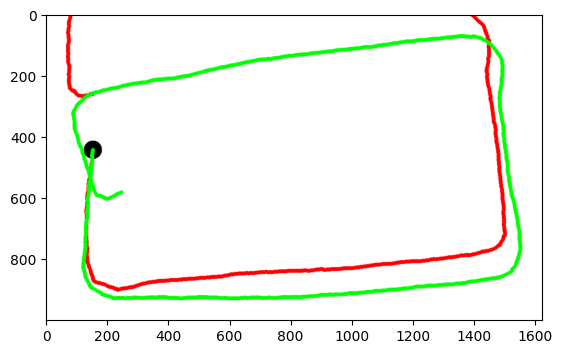

In [3]:


path = os.getcwd() + "/data/output/"
dirs = [path + d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
dirs.sort()
fullpath = dirs[-1]
fullpath += "/"
dirs = [
    fullpath + d
    for d in os.listdir(fullpath)
    if os.path.isdir(os.path.join(fullpath, d))
]

all_poses = []
for dir in dirs:
    settings = json.load(open(dir + "/settings.json"))
    name = (
        FM[int(settings["feat_match"])]
        + "_"
        + str(settings["num_feat"])
        + "_"
        + str(settings["scale_factor"])
        + "_"
        + str(settings["denoise"])
    )

    all_poses.append(json.load(open(dir + "/est.json")))

map = draw_maps(all_poses, no_gt=True)
height = 1000
width = (height / map.shape[0]) * map.shape[1]
map = cv.resize(map, (int(width), height))

plt.imshow(map)
plt.show()
